For this makemore, we implement a birgam character-level language model.

In [ ]:
# first import names.csv file and turn into a list of names
import csv

with open('names.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # skip the first row
    with open('names.txt', 'w') as txtfile:
        for i, row in enumerate(csvreader):
            if i < 1000:  # for the first 1000 rows
                name1 = row[1]
                name2 = row[2]
                txtfile.write(name1 + '\n')
                txtfile.write(name2 + '\n') 

In [26]:
# turn all letters to lowercase. this is important because 'A' and 'a' are different characters for the model
with open('names.txt', 'r') as f:
    names = f.read()

with open('names.txt', 'w') as f:
    f.write(names.lower())

In [27]:
# we can now read the names.txt file
words = open('names.txt', 'r').read().splitlines()
print(len(words))
print(words[:10])

2000
['olivia', 'liam', 'emma', 'noah', 'charlotte', 'oliver', 'amelia', 'elijah', 'ava', 'james']


The model we will be making predicts the next letter based on the previous 2 letters. First we visualize how we will preprocess the data to make this possible.

In [28]:
# prepare the data for the bigram model

b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

# to visualize we print the first 10 bigrams
print(list(b.items())[:10])

[(('<S>', 'o'), 27), (('o', 'l'), 49), (('l', 'i'), 183), (('i', 'v'), 17), (('v', 'i'), 49), (('i', 'a'), 165), (('a', '<E>'), 384), (('<S>', 'l'), 124), (('a', 'm'), 84), (('m', '<E>'), 26)]


As you can see, we use < S > to indicate the start of a name and < E > to indicate the end of a name. The number associated counts the amount of times that particular bigram occurs in the data.

In [29]:
# we sort this data from highest to lowest
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 414),
 (('a', '<E>'), 384),
 (('a', 'n'), 328),
 (('e', '<E>'), 286),
 (('<S>', 'a'), 274),
 (('l', 'e'), 227),
 (('e', 'l'), 213),
 (('a', 'r'), 192),
 (('l', 'a'), 185),
 (('l', 'i'), 183),
 (('y', '<E>'), 176),
 (('e', 'n'), 175),
 (('a', 'l'), 171),
 (('<S>', 'm'), 168),
 (('o', 'n'), 167),
 (('i', 'a'), 165),
 (('r', 'i'), 158),
 (('e', 'r'), 156),
 (('n', 'a'), 155),
 (('<S>', 'j'), 149),
 (('<S>', 'k'), 149),
 (('m', 'a'), 143),
 (('i', 'n'), 133),
 (('r', 'a'), 130),
 (('<S>', 'c'), 129),
 (('<S>', 'l'), 124),
 (('r', '<E>'), 122),
 (('<S>', 'e'), 121),
 (('i', 'e'), 118),
 (('<S>', 'r'), 114),
 (('r', 'e'), 107),
 (('h', 'a'), 104),
 (('<S>', 's'), 103),
 (('<S>', 'b'), 103),
 (('l', 'l'), 102),
 (('h', '<E>'), 99),
 (('a', 'y'), 96),
 (('s', '<E>'), 94),
 (('i', 's'), 94),
 (('n', 'n'), 90),
 (('i', '<E>'), 86),
 (('i', 'l'), 85),
 (('d', 'e'), 85),
 (('o', '<E>'), 85),
 (('<S>', 'd'), 85),
 (('a', 'i'), 85),
 (('a', 'm'), 84),
 (('m', 'i'), 84),
 (('n', 'e'),

In [30]:
# from here we import torch and implement a 2D tensor
import torch
N = torch.zeros((27,27), dtype=torch.int32)

In [31]:
# we create a string to integer mapping
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [36]:
# we now create the bigram matrix
for w in words:
  chs = ['.'] + list(w) + ['.'] # add start and end tokens
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [42]:
# the start and end token is now represented as follows
print(chs)

['.', 'd', 'a', 'v', 'i', 'a', 'n', '.']


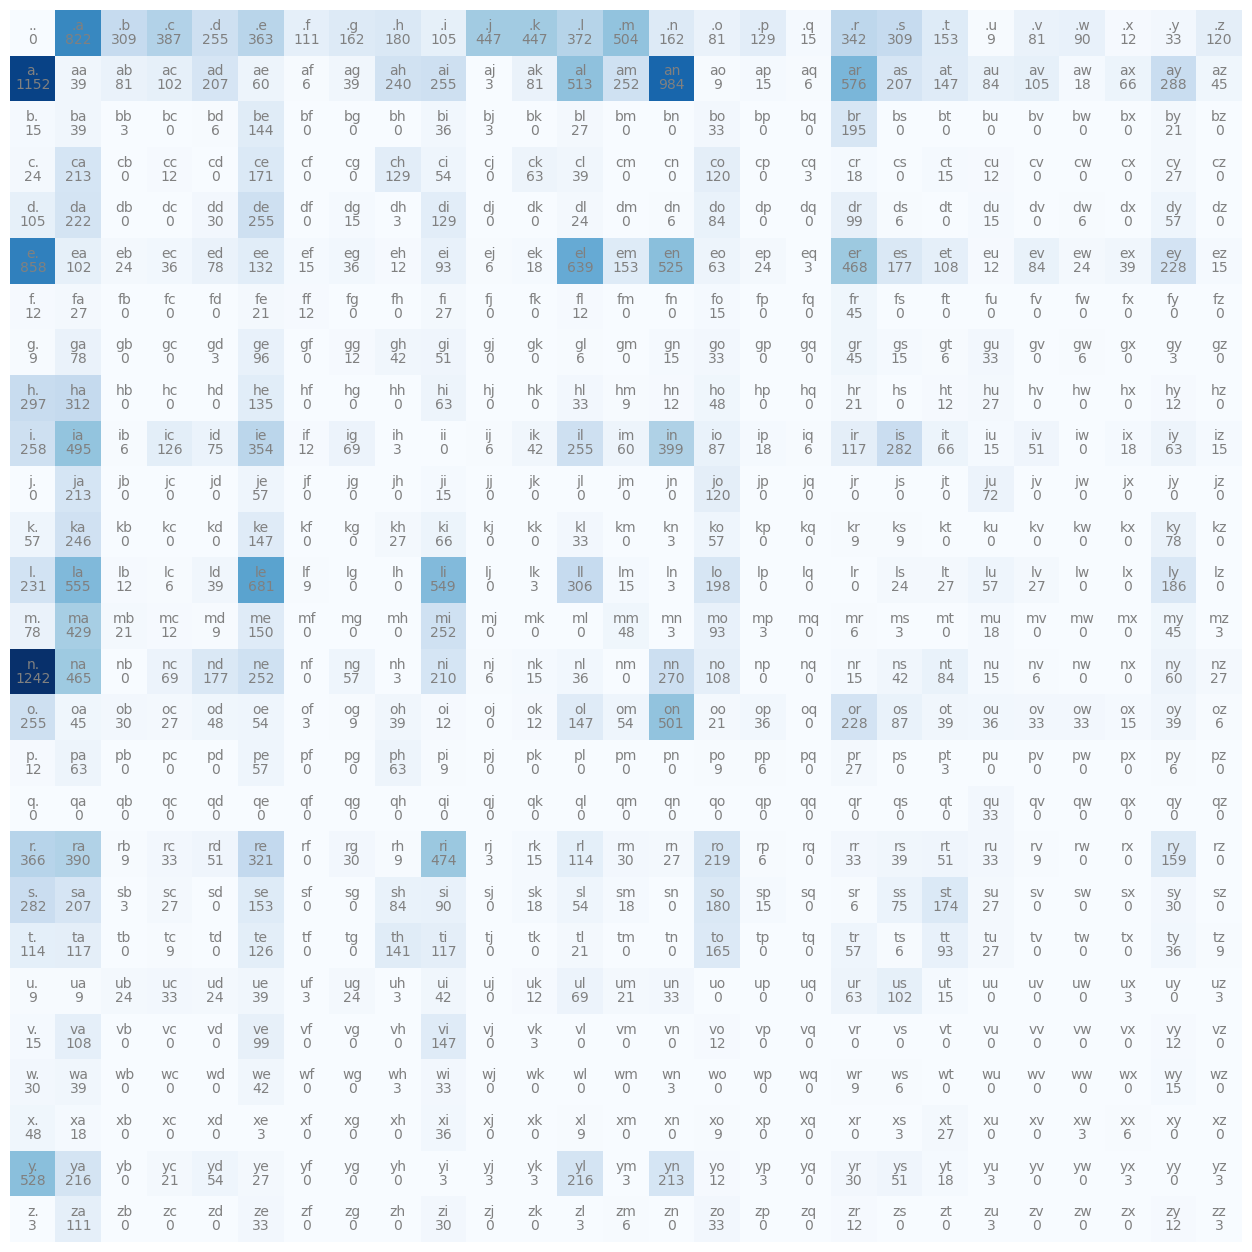

In [43]:
# we can now visualize the bigram matrix using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');